# COVID-19 Impacts on North America (Data Exploration and Clean-up)

# COVID Case Count - Global and North America

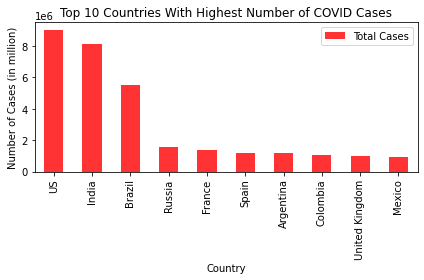

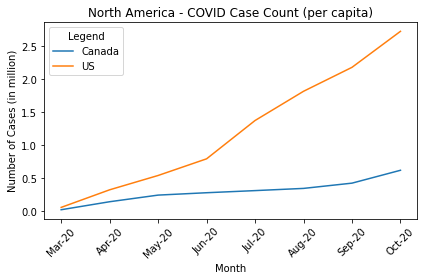

In [28]:
%run COVID_Case_Count.ipynb

In [3]:
#Selecting the required columns for analysis from the John Hopkins Github Repository dataset
new_cases_df = cases_df[["Country/Region", "10/30/20"]]

#Renaming the columns for better understanding
renamed_cases = new_cases_df.rename(columns={"Country/Region" : "Country",
                                        "10/30/20" : "Total Cases"})
renamed_cases= renamed_cases.groupby(["Country"])

#Summing up the total cases and sorting them by descending order to find the top 10 countries with the highest number of COVID cases as of October 2020
summary_df = pd.DataFrame({"Total Cases" : renamed_cases["Total Cases"].sum()})
summary_df = summary_df.sort_values(["Total Cases"], ascending= False)
top_ten_df = summary_df.head(10)

In [4]:
#Extracting Canada's data from the dataset
new_cases_df = cases_df[["Country/Region", "3/31/20", "4/30/20", "5/31/20", "6/30/20","7/31/20","8/31/20","9/30/20", "10/30/20"]]
canada_df= new_cases_df.loc[new_cases_df["Country/Region"] == "Canada"]
#Grouping the Column by State and getting a count of the Total Number of Cases 
canada_casecount = canada_df.groupby(["Country/Region"]).sum()

#Getting US case count data from the dataset
new_confirmed_df = confirmed_df[["Country_Region", "3/31/20", "4/30/20", "5/31/20", "6/30/20","7/31/20","8/31/20","9/30/20", "10/30/20"]]
#Grouping the Column by State and getting a count of the Total Number of Cases 
us_casecount = new_confirmed_df.groupby(["Country_Region"]).sum()

In [5]:
#Merging the two Dataframes
merged_df = pd.concat([canada_casecount, us_casecount])

#Transposing the marged_df to get the countires as our columns
merged_transpose = merged_df.transpose()

#Resetting the index and renaming it
reset_index = merged_transpose.reset_index()
renamed_df = reset_index.rename(columns= {"index" : "Month"})
renamed_df

,Month,Canada,US
0,3/31/20,8527,192101
1,4/30/20,54457,1076694
2,5/31/20,92479,1796670
3,6/30/20,106097,2634076
4,7/31/20,118281,4560437
5,8/31/20,130918,6029571
6,9/30/20,161107,7234242
7,10/30/20,234939,9044255


In [6]:
#Total population of Canada and US as of October 2020 from Worldometers.info
population_canada = 37858112
population_us = 331685117

#Calculating the COVID cases for Canada as a percentage of its total population
canada_population = ((merged_transpose["Canada"].div(population_canada))*100).to_frame()
canada_index = canada_population.reset_index()
canada_rename = canada_index.rename(columns={"index" : "Month"})

#Calculating the COVID cases for US as a percentage of its total population
us_population = ((merged_transpose["US"].div(population_us))*100).to_frame()
us_index = us_population.reset_index()
us_rename = us_index.rename(columns={"index" : "Month"})

In [7]:
#Merging the tow Dataframe for plotting
merged_population = pd.merge(canada_rename, us_rename, on="Month")
merged_population

,Month,Canada,US
0,3/31/20,0.022524,0.057917
1,4/30/20,0.143845,0.324613
2,5/31/20,0.244278,0.541679
3,6/30/20,0.280249,0.794150
4,7/31/20,0.312432,1.374930
5,8/31/20,0.345812,1.817860
6,9/30/20,0.425555,2.181057
7,10/30/20,0.620578,2.726759


# Canadian Unemployment

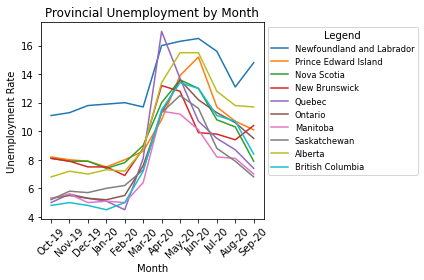

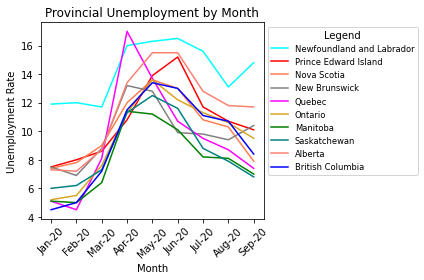

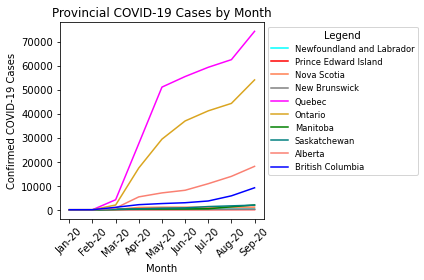

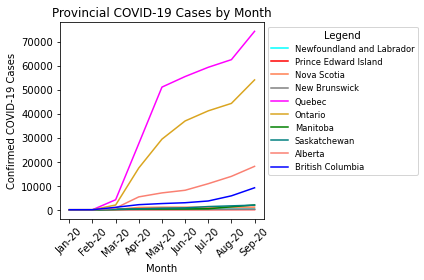

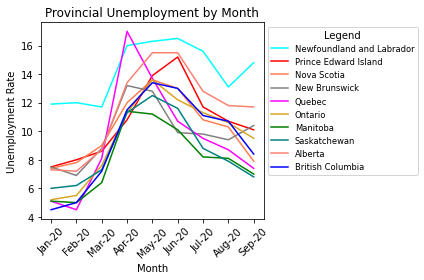

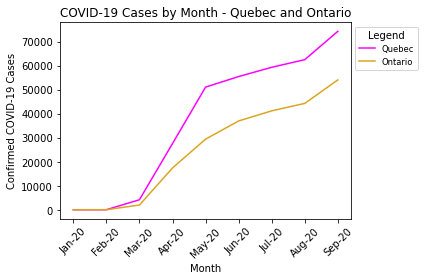

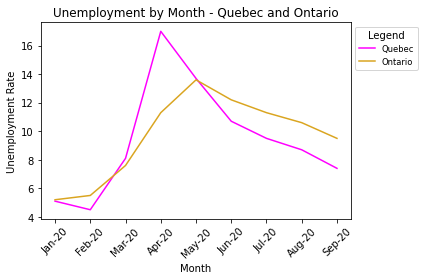

In [8]:
%run Unemployment-CAN.ipynb

In [9]:
# Stats Canada data was used for monthly unemployment rates by province. 
# This data was contained in 6 csv files, which were merged into one dataframe (using pd.merge)

merged_can_unemp = pd.merge(oct_nov_19, dec_jan_20, on ="Geography 4")
merged_can_unemp = pd.merge(merged_can_unemp, feb_mar_20, on ="Geography 4")
merged_can_unemp = pd.merge(merged_can_unemp, apr_may_20, on ="Geography 4")
merged_can_unemp = pd.merge(merged_can_unemp, jun_jul_20, on ="Geography 4")
merged_can_unemp = pd.merge(merged_can_unemp, aug_sep_20, on ="Geography 4")


prov_can_unemp = merged_can_unemp.drop([0])
prov_can_unemp = prov_can_unemp.rename(columns={"Geography 4": "Province"})
prov_can_unemp

,Province,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20
1,Newfoundland and Labrador,11.1,11.3,11.8,11.9,12.0,11.7,16.0,16.3,16.5,15.6,13.1,14.8
2,Prince Edward Island,8.2,8.0,7.9,7.5,8.0,8.6,10.8,13.9,15.2,11.7,10.7,10.1
3,Nova Scotia,8.1,7.9,7.9,7.4,7.8,9.0,12.0,13.6,13.0,10.8,10.3,7.9
4,New Brunswick,8.1,7.9,7.5,7.5,6.9,8.8,13.2,12.8,9.9,9.8,9.4,10.4
5,Quebec,5.0,5.6,5.3,5.1,4.5,8.1,17.0,13.7,10.7,9.5,8.7,7.4
6,Ontario,5.3,5.5,5.3,5.2,5.5,7.6,11.3,13.6,12.2,11.3,10.6,9.5
7,Manitoba,5.3,5.6,5.0,5.1,5.0,6.4,11.4,11.2,10.1,8.2,8.1,7.0
8,Saskatchewan,5.2,5.8,5.7,6.0,6.2,7.3,11.3,12.5,11.6,8.8,7.9,6.8
9,Alberta,6.8,7.2,7.0,7.3,7.2,8.7,13.4,15.5,15.5,12.8,11.8,11.7
10,British Columbia,4.8,5.0,4.8,4.5,5.0,7.2,11.5,13.4,13.0,11.1,10.7,8.4


In [10]:
# The dataframe was transposed in order to facilitate formatting to plot the data. 

prov_can_unemp = prov_can_unemp.transpose()


columns= prov_can_unemp.iloc[0].values
prov_can_unemp.columns=columns
prov_can_unemp.drop('Province', axis =0, inplace=True)
prov_can_unemp.reset_index(inplace =True)
prov_can_unemp.rename(columns = {"index":"Month"}, inplace=True)
prov_can_unemp

,Month,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia
0,Oct-19,11.1,8.2,8.1,8.1,5,5.3,5.3,5.2,6.8,4.8
1,Nov-19,11.3,8,7.9,7.9,5.6,5.5,5.6,5.8,7.2,5
2,Dec-19,11.8,7.9,7.9,7.5,5.3,5.3,5,5.7,7,4.8
3,Jan-20,11.9,7.5,7.4,7.5,5.1,5.2,5.1,6,7.3,4.5
4,Feb-20,12,8,7.8,6.9,4.5,5.5,5,6.2,7.2,5
5,Mar-20,11.7,8.6,9,8.8,8.1,7.6,6.4,7.3,8.7,7.2
6,Apr-20,16,10.8,12,13.2,17,11.3,11.4,11.3,13.4,11.5
7,May-20,16.3,13.9,13.6,12.8,13.7,13.6,11.2,12.5,15.5,13.4
8,Jun-20,16.5,15.2,13,9.9,10.7,12.2,10.1,11.6,15.5,13
9,Jul-20,15.6,11.7,10.8,9.8,9.5,11.3,8.2,8.8,12.8,11.1


In [11]:
#Johns Hopkins data was used for COVID-19 confirmed case counts. 
#This data contained all global data so we isolated for Canada specifically, by province. 
#Excluded cruise ship (Diamond Princess) cases. 
#Only include case counts on last day of the month to capture the monthly total as the data was a cumulative amount. 

can_cases_filepath = os.path.join("Resources", "confirmed_global.csv")
can_cases = pd.read_csv(can_cases_filepath)

can_cases = can_cases.loc[can_cases["Country/Region"]=="Canada"]
can_cases = can_cases.drop([41,42])
can_cases = can_cases[["Province/State", "1/31/20", "2/29/20", "3/31/20","4/30/20", "5/31/20", 
                       "6/30/20", "7/31/20", "8/31/20", "9/30/20"]]

can_cases = can_cases.rename(columns = {"Province/State":"Province"})
can_cases

,Province,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20
39,Alberta,0,0,690,5355,7010,8108,10843,13902,18062
40,British Columbia,1,8,1013,2112,2573,2916,3641,5790,9138
43,Manitoba,0,0,103,277,295,325,415,1214,1993
44,New Brunswick,0,0,70,118,132,165,170,191,200
45,Newfoundland and Labrador,0,0,152,258,261,261,266,269,274
46,Northwest Territories,0,0,1,5,5,5,5,5,5
47,Nova Scotia,0,0,147,947,1056,1062,1069,1085,1088
48,Ontario,3,11,1966,17395,29390,36961,41178,44279,54059
49,Prince Edward Island,0,0,21,27,27,27,36,44,59
50,Quebec,0,1,4162,27550,51059,55458,59312,62492,74288


In [12]:
#Transpose data to have Provinces in columns and groupby Month
can_cases = can_cases.transpose()

columns= can_cases.iloc[0].values
can_cases.columns=columns
can_cases.drop('Province', axis =0, inplace=True)
can_cases.reset_index(inplace =True)
can_cases.rename(columns = {"index":"Month"}, inplace=True)
can_cases

,Month,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon
0,1/31/20,0,1,0,0,0,0,0,3,0,0,0,0
1,2/29/20,0,8,0,0,0,0,0,11,0,1,0,0
2,3/31/20,690,1013,103,70,152,1,147,1966,21,4162,184,5
3,4/30/20,5355,2112,277,118,258,5,947,17395,27,27550,389,11
4,5/31/20,7010,2573,295,132,261,5,1056,29390,27,51059,646,11
5,6/30/20,8108,2916,325,165,261,5,1062,36961,27,55458,785,11
6,7/31/20,10843,3641,415,170,266,5,1069,41178,36,59312,1319,14
7,8/31/20,13902,5790,1214,191,269,5,1085,44279,44,62492,1619,15
8,9/30/20,18062,9138,1993,200,274,5,1088,54059,59,74288,1913,15


# Canadian Tourism

# Part 1: Dollar Impact:

/Users/fatimamukaddam/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/Users/fatimamukaddam/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Headline: From Flattening the Curve to Pandemic: A Coronavirus Glossary
Lead Paragraph: When is an epidemic considered a pandemic, and what is the difference? What do health officials mean when they recommend “self-quarantining” or “social distancing”?
Publication Date: 2020-03-18T16:41:20+0000
---------------------------
Headline: Coronavirus Has Become a Pandemic, W.H.O. Says
Lead Paragraph: The spread of the coronavirus is now a pandemic, officials at the World Health Organization said on Wednesday.
Publication Date: 2020-03-11T19:59:48+0000
---------------------------
Headline: Coronavirus Pandemic, Angela Merkel, Markets: Your Thursday Briefing
Lead Paragraph: (Want to get this briefing by email? Here’s the sign-up.)
Publication Date: 2020-03-11T19:41:34+0000
---------------------------
Headline: The World Has a Plan to Fight Coronavirus. Most Countries Are Not Using it.
Lead Paragraph: For weeks, the World Health Organization resisted declaring the coronavirus outbreak a pandemic

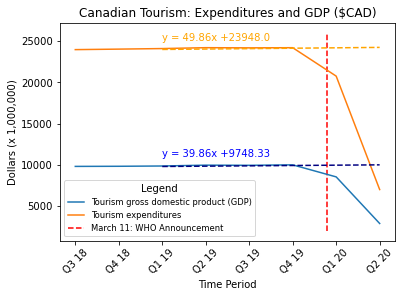

In [13]:
%run Tourism_Impact_CAN_Dollars.ipynb

In [14]:
#Stats Canada Tourism demand (expenditures) data was isolated for Total Tourism expenditures and the data was transposed.
#Data type was changed from object to integer for plotting. 

demand_sum = demand_merged.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
demand_sum = demand_sum.transpose()

demand_sum.columns = demand_sum.iloc[0]
demand_sum_trans = demand_sum[1:]

demand_sum_trans.reset_index(inplace =True)
demand_sum_trans.rename(columns = {"index":"Period"}, inplace=True)

demand_sum_trans_int = demand_sum_trans.copy()
demand_sum_trans_int['Tourism expenditures'] = demand_sum_trans_int['Tourism expenditures'].str.replace(',', '').astype(int)

demand_sum_trans_int



/Users/fatimamukaddam/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Expenditures,Period,Tourism expenditures
0,Q3 2018,23976
1,Q4 2018,24038
2,Q1 2019,24105
3,Q2 2019,24213
4,Q3 2019,24192
5,Q4 2019,24211
6,Q1 2020,20760
7,Q2 2020,6988


In [15]:
#Stats Canada Tourism GDP data was isolated for Total Tourism expenditures and the data was transposed.
#Data type was changed from object to integer for plotting. 

gdp_sum = gdp_merged.drop([1,2,3,4,5,6])
gdp_sum = gdp_sum.transpose()

gdp_sum.columns = gdp_sum.iloc[0]
gdp_sum_trans =gdp_sum[1:]

gdp_sum_trans.reset_index(inplace =True)
gdp_sum_trans.rename(columns = {"index":"Period"}, inplace=True)

gdp_sum_trans_int = gdp_sum_trans.copy()
gdp_sum_trans_int['Tourism gross domestic product (GDP)'] = gdp_sum_trans_int['Tourism gross domestic product (GDP)'].str.replace(',', '').astype(int)

gdp_sum_trans_int


/Users/fatimamukaddam/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Activities,Period,Tourism gross domestic product (GDP)
0,Q3 2018,9799
1,Q4 2018,9813
2,Q1 2019,9847
3,Q2 2019,9950
4,Q3 2019,9932
5,Q4 2019,9986
6,Q1 2020,8525
7,Q2 2020,2867


In [16]:
#Merge Tourism Expenditure $ and GDP $ data 

merged_dollar = pd.merge(gdp_sum_trans_int, demand_sum_trans_int, on = "Period")
merged_dollar


,Period,Tourism gross domestic product (GDP),Tourism expenditures
0,Q3 2018,9799,23976
1,Q4 2018,9813,24038
2,Q1 2019,9847,24105
3,Q2 2019,9950,24213
4,Q3 2019,9932,24192
5,Q4 2019,9986,24211
6,Q1 2020,8525,20760
7,Q2 2020,2867,6988


In [17]:
#Seperate data for "pre-covid" - up to Q4 2019
# Calculate linear regression model for results pre-covid (up to Q4 2019)

pre_covid = merged_dollar.drop([6,7])
pre_covid['Period No'] = [1,2,3,4,5,6]

x =pre_covid['Period No']
y = pre_covid['Tourism gross domestic product (GDP)']
y2 = pre_covid['Tourism expenditures']

gdp_slope, gdp_int, gdp_r, gdp_p, gdp_std_err = st.linregress(x,y)
gdp_fit = gdp_slope * x + gdp_int

exp_slope, exp_int, exp_r, exp_p, exp_std_err = st.linregress(x,y2)
exp_fit = exp_slope * x + exp_int

line_eq_gdp = "GDP Line Equation: y = " + str(round(gdp_slope,2)) + "x +" + str(round(gdp_int,2))
line_eq_exp = "Expenditure Line Equation: y = " + str(round(exp_slope,2)) + "x +" + str(round(exp_int,2))

print(line_eq_gdp)
print(line_eq_exp)


GDP Line Equation: y = 39.86x +9748.33
Expenditure Line Equation: y = 49.86x +23948.0


In [18]:
#Seperate data for "post-covid" - Q1 and Q2 2020. 
#Use the line equations to forecast GDP and expendiures with pre-COVID trends

post_covid = merged_dollar.drop([0,1,2,3,4,5])
post_covid = post_covid.rename(columns={"Tourism gross domestic product (GDP)": "GDP Actual", "Tourism expenditures":"Expenditures Actuals"})
post_covid['Period No'] = [7,8]

q1_20_proj_gdp = gdp_slope * 7 + gdp_int
q2_20_proj_gdp = gdp_slope * 8 + gdp_int

q1_20_proj_exp = exp_slope * 7 + exp_int
q2_20_proj_exp = exp_slope * 8 + exp_int

post_covid['GDP Projected'] = [q1_20_proj_gdp, q2_20_proj_gdp]
post_covid['Expenditures Projected'] = [q1_20_proj_exp, q2_20_proj_exp]
post_covid['GDP Impact']= post_covid['GDP Actual'] - post_covid['GDP Projected']
post_covid['Expenditures Impact']= post_covid['Expenditures Actuals'] - post_covid['Expenditures Projected']

#Formatting
post_covid.loc['Total']= post_covid.sum()
post_covid["GDP Actual"]=post_covid["GDP Actual"].map("${:,.0f}".format)
post_covid["Expenditures Actuals"]=post_covid["Expenditures Actuals"].map("${:,.0f}".format)
post_covid["GDP Projected"]=post_covid["GDP Projected"].map("${:,.0f}".format)
post_covid["Expenditures Projected"]=post_covid["Expenditures Projected"].map("${:,.0f}".format)
post_covid["GDP Impact"]=post_covid["GDP Impact"].map("${:,.0f}".format)
post_covid["Expenditures Impact"]=post_covid["Expenditures Impact"].map("${:,.0f}".format)

post_covid

,Period,GDP Actual,Expenditures Actuals,Period No,GDP Projected,Expenditures Projected,GDP Impact,Expenditures Impact
6,Q1 2020,"$8,525","$20,760",7,"$10,027","$24,297","$-1,502","$-3,537"
7,Q2 2020,"$2,867","$6,988",8,"$10,067","$24,347","$-7,200","$-17,359"
Total,Q1 2020Q2 2020,"$11,392","$27,748",15,"$20,095","$48,644","$-8,703","$-20,896"


In [19]:
#Use the NY Times API to determine the date when the WHO declared a global pandemic. 

import requests
import time
from pprint import pprint

api_key = 'AHD58yFBu6t1DV7UGF2hdMCyfo2PvaHq'
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"

# Store a search term
query = "Coronavirus Pandemic WHO"

# Search for articles published between a begin and end date
begin_date = "20200301"
end_date = "20200320"

query_url = f"{url}api-key={api_key}&q={query}&begin_date={begin_date}&end_date={end_date}"

# Retrieve articles
articles = requests.get(query_url).json()


In [20]:
# From the responses below, March 11th is the date that the WHO declared COVID-19 to be a global pandemic. 
# This was used as a vertical line in the graph to show a key date. 

articles_list = articles["response"]["docs"]

for article in articles_list:
    print(f'Headline: {article["headline"]["main"]}')
    print(f'Lead Paragraph: {article["lead_paragraph"]}')
    print(f'Publication Date: {article["pub_date"]}')
    print('---------------------------')
    


Headline: From Flattening the Curve to Pandemic: A Coronavirus Glossary
Lead Paragraph: When is an epidemic considered a pandemic, and what is the difference? What do health officials mean when they recommend “self-quarantining” or “social distancing”?
Publication Date: 2020-03-18T16:41:20+0000
---------------------------
Headline: Coronavirus Has Become a Pandemic, W.H.O. Says
Lead Paragraph: The spread of the coronavirus is now a pandemic, officials at the World Health Organization said on Wednesday.
Publication Date: 2020-03-11T19:59:48+0000
---------------------------
Headline: Coronavirus Pandemic, Angela Merkel, Markets: Your Thursday Briefing
Lead Paragraph: (Want to get this briefing by email? Here’s the sign-up.)
Publication Date: 2020-03-11T19:41:34+0000
---------------------------
Headline: The World Has a Plan to Fight Coronavirus. Most Countries Are Not Using it.
Lead Paragraph: For weeks, the World Health Organization resisted declaring the coronavirus outbreak a pandemic

# Part 2: Employment Impact

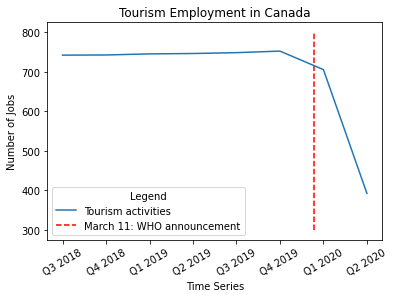

In [21]:
%run Tourism_employment_Canada.ipynb

In [22]:
# Read in Stats Canada data on Employment generated by tourism (x 1,000) jobs in 2 files and merge data. 

tourism_empl_Q3_18_Q1_19 = os.path.join("Resources", "Employment Tourism Canada Q3 18 to Q1 19.csv")
tourism_empl_Q3_18_Q1_19_df = pd.read_csv(tourism_empl_Q3_18_Q1_19)
tourism_empl_Q3_18_Q1_19_df = tourism_empl_Q3_18_Q1_19_df.dropna()

tourism_empl_Q2_19_Q2_20 = os.path.join("Resources","Employment Tourism Canada Q2 19 to Q2 20.csv")
tourism_empl_Q2_19_Q2_20_df = pd.read_csv(tourism_empl_Q2_19_Q2_20)
tourism_empl_Q2_19_Q2_20_df = tourism_empl_Q2_19_Q2_20_df.dropna()

employment_merged = pd.merge(tourism_empl_Q3_18_Q1_19_df, tourism_empl_Q2_19_Q2_20_df, on = "Activities" )
employment_merged

,Activities,Q3 2018,Q4 2018,Q1 2019,Q2 2019,Q3 2019,Q4 2019,Q1 2020,Q2 2020
0,Tourism activities,742,742.4,745.2,746.1,748.3,752.2,705.4,392.4
1,Total tourism industries,585.6,585.1,587.4,587.9,590.4,594.4,555.7,296.1
2,Transportation,86.9,84.2,85.6,85.3,87.0,88.8,85.4,65.7
3,Air transportation,54.6,54.1,55.4,54.8,56.4,58.6,57.5,47.0
4,Other transportation,32.3,30.1,30.2,30.5,30.6,30.2,27.9,18.7
5,Accommodation,149.9,150.5,151.3,150.6,151.6,152.5,142.3,65.0
6,Food and beverage services,236.3,237.3,236.7,238,237.3,238.2,219.0,103.6
7,Other tourism activities,112.5,113.1,113.8,114,114.5,114.9,109.0,61.8
8,Recreation and entertainment,68.3,69.3,68.6,69.1,69.6,69.9,66.5,31.4
9,Travel agencies,44.2,43.8,45.2,44.9,44.9,45.0,42.5,30.4


In [23]:
#Select the column required for analysis by dropping all the other columns
employment_sum = employment_merged.drop([1,2,3,4,5,6,7,8,9,10])
employment_sum = employment_sum.transpose()

employment_sum.columns = employment_sum.iloc[0]
employment_sum_trans = employment_sum[1:]


employment_sum_trans

Activities,Tourism activities
Q3 2018,742
Q4 2018,742.4
Q1 2019,745.2
Q2 2019,746.1
Q3 2019,748.3
Q4 2019,752.2
Q1 2020,705.4
Q2 2020,392.4


In [24]:
#Convert the data type to float inorder to plot the graph
employment_df = pd.to_numeric(employment_sum_trans["Tourism activities"])

# COVID-19 Demographics Canada

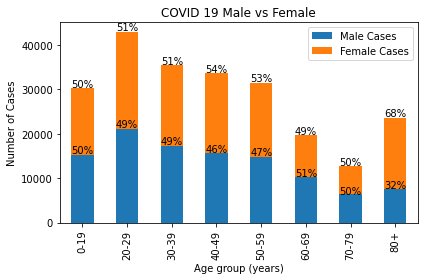

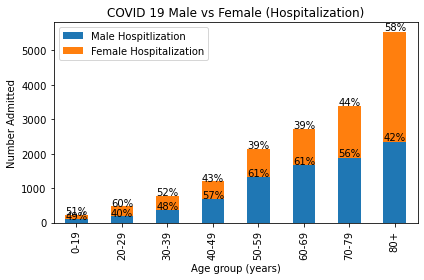

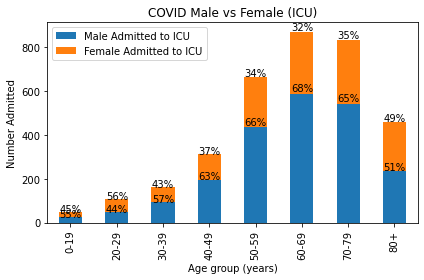

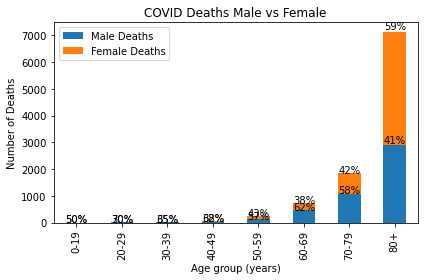

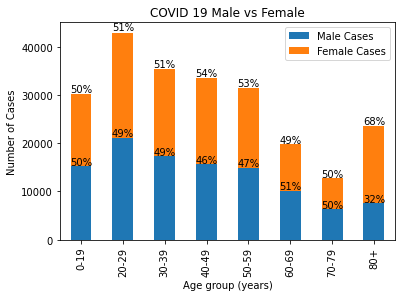

<Figure size 432x288 with 0 Axes>

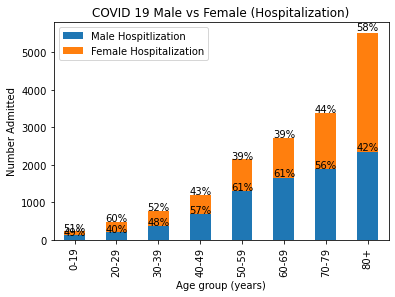

<Figure size 432x288 with 0 Axes>

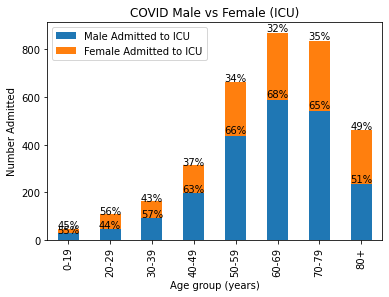

<Figure size 432x288 with 0 Axes>

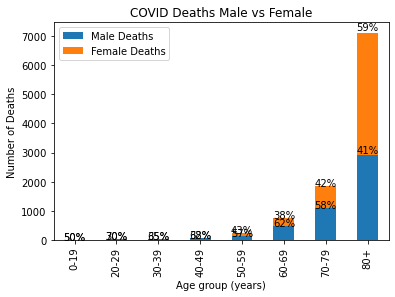

<Figure size 432x288 with 0 Axes>

In [25]:
%run Demographics.ipynb

In [26]:
#Stats Canada Provides Demographic data based on total infections between demographics 
#and hospitalizations rates so pulling all this data.
otalCases = os.path.join("Resources/Total Cases.csv")
Demographic_Data = os.path.join("Resources/Demographic Data.csv")
Demographic_Data_Deceased = os.path.join("Resources/Demographic Data for deceased.csv")
Demographic_Data_Hospitalized = os.path.join("Resources/Demographic Data for Hospitalization.csv")
Demographic_Data_ICU = os.path.join("Resources/Demographic Data Admited ICU.csv")

Total_Cases = pd.read_csv(TotalCases)
Infection_Demo = pd.read_csv(Demographic_Data, thousands=',')
Deceased_Demo = pd.read_csv(Demographic_Data_Deceased, thousands=',')
Hospitalized_Demo = pd.read_csv(Demographic_Data_Hospitalized, thousands=',')
ICU_Demo = pd.read_csv(Demographic_Data_ICU)

# Merging all the different demographic Data pulled from stats Canada:
Merge_1 = pd.merge(Infection_Demo,Deceased_Demo,how="right", on=["Age group (years)"])
Merge_2 = pd.merge(Merge_1,Hospitalized_Demo,how="right", on=["Age group (years)"])
All_data = pd.merge(Merge_2,ICU_Demo,how="right", on=["Age group (years)"])

# Renaming the columns and taking out the columns not needed for analysis:
All_data = All_data.rename(columns={"Number of male cases (proportion)": "Male Cases",
                                    "Number of female cases (proportion)":"Female Cases",
                                    "Number of male cases (Deceased)": "Male Deaths",
                                    "Number of female cases (Deceased)": "Female Deaths",
                                    "Number of male cases (Hospitalized)": "Male Hospitlization",
                                    "Number of female cases (Hospitalized)": "Female Hospitalization",
                                    "Number of male cases (ICU)": "Male Admitted to ICU",
                                    "Number of female cases (ICU)": "Female Admitted to ICU"})

# Selecting the columns needed for the analysis
Demographic_Data = All_data[["Age group (years)","Male Cases", "Female Cases", "Male Hospitlization", "Female Hospitalization",
                                 "Male Admitted to ICU","Female Admitted to ICU","Male Deaths","Female Deaths"]]
Demographic_Data

,Age group (years),Male Cases,Female Cases,Male Hospitlization,Female Hospitalization,Male Admitted to ICU,Female Admitted to ICU,Male Deaths,Female Deaths
0,0-19,15232,15035,112,117,26,21,1,1
1,20-29,21142,21784,195,290,47,59,7,3
2,30-39,17283,18108,371,407,93,69,11,6
3,40-49,15620,17988,686,517,196,116,42,20
4,50-59,14872,16582,1310,838,438,226,139,104
5,60-69,10193,9628,1659,1068,588,283,457,278
6,70-79,6373,6424,1877,1499,542,294,1074,769
7,80+,7668,15973,2341,3190,236,225,2914,4214


In [27]:
#Selecting Columns for Graph 1
Demographic_Data[['Age group (years)', "Male Cases", "Female Cases"]]

#Selecting Columns for Graph 2
Demographic_Data[['Age group (years)', "Male Hospitlization", "Female Hospitalization"]]

#Selecting Columns for Graph 3
Demographic_Data[['Age group (years)', "Male Admitted to ICU", "Female Admitted to ICU"]]

#Selecting Columns for Graph 4
Demographic_Data[['Age group (years)', "Male Deaths", 'Female Deaths']]

,Age group (years),Male Deaths,Female Deaths
0,0-19,1,1
1,20-29,7,3
2,30-39,11,6
3,40-49,42,20
4,50-59,139,104
5,60-69,457,278
6,70-79,1074,769
7,80+,2914,4214
